# Batch vs Stochastics vs Mini Batch Gradient Descent

### Import Necessary Libraries

In [3]:
import time
import warnings
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
warnings.filterwarnings('ignore')
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading Data

In [4]:
df = pd.read_csv(r'./Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [10]:
# we don't need "User ID", "Gender" so let's drop this colums	

In [11]:
columns_to_drop = ['User ID', 'Gender']
df.drop(columns=columns_to_drop, inplace=True)
df.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [12]:
# or we can do it 
# df = df[['Age','EstimatedSalary','Purchased']]

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [16]:
# let's scaling the data

In [17]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [19]:
X_scaled.shape

(400, 2)

In [20]:
# spliting

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [22]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [23]:
y_train.shape, y_test.shape

((320,), (80,))

In [24]:
# Modeling

In [37]:
model = Sequential()

# here is 4 layers:  1 is input, 2 hidden layers, 1 is output 
model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                30        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Batch_Size Gradient Descent

In [33]:
model.compile(loss='binary_crossentropy', metrics='accuracy')
# this is classification problem that's why loss function is binary_crossentropy
start = time.time()
histroy = model.fit(X_train, y_train, epochs=10, batch_size=320)
"""
batch_size=320 it's mean my X_train number of rows, if i take batch_size=320 then it will become a
batch_size, or if we take batch_size=1 then it will become a stochastic gradient descent.
"""
print(f'Run_Time: {time.time() - start}')

Epoch 1/10
1/1 [==============================] - 1s 635ms/step - loss: 5170.2432 - accuracy: 0.3469
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 4474.4570 - accuracy: 0.3469
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 3976.3157 - accuracy: 0.3469
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 3562.9343 - accuracy: 0.3469
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 3198.6008 - accuracy: 0.3469
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 2866.7791 - accuracy: 0.3469
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 2558.2642 - accuracy: 0.3469
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 2267.3386 - accuracy: 0.3469
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 1990.1761 - accuracy: 0.3469
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 1724.0756 - accuracy: 0.346

In [ ]:
"""Now Look we use batch_size=320 it's mean it's batch_size gradient decent
and it's updated just 1 time into each Epoch and se the Run_Time: 0.8874478340148926 """

# Stochastic Gradient Descent

In [34]:
model.compile(loss='binary_crossentropy', metrics='accuracy')
start = time.time()
histroy = model.fit(X_train, y_train, epochs=10, batch_size=1)
print(f'Run_Time: {time.time() - start}')

Epoch 1/10
320/320 [==============================] - 1s 2ms/step - loss: 137.9872 - accuracy: 0.5562
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 126.3201 - accuracy: 0.5281
Epoch 3/10
320/320 [==============================] - 1s 2ms/step - loss: 125.3740 - accuracy: 0.5281
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 136.0777 - accuracy: 0.4875
Epoch 5/10
320/320 [==============================] - 1s 2ms/step - loss: 120.4416 - accuracy: 0.5406
Epoch 6/10
320/320 [==============================] - 1s 2ms/step - loss: 122.1698 - accuracy: 0.5125
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 127.4143 - accuracy: 0.4656
Epoch 8/10
320/320 [==============================] - 1s 2ms/step - loss: 116.7750 - accuracy: 0.5531
Epoch 9/10
320/320 [==============================] - 1s 2ms/step - loss: 112.2758 - accuracy: 0.5469
Epoch 10/10
320/320 [==============================] - 1s 2ms/step - loss: 122.251

In [ ]:
""""Now Look we use Stochastic it's mean it's Stochastic gradient decent</br>
and it's updated weight 320 time into each Epoch and se the Run_Time: 7.3454389572143555 """

### It's mean batch_size is faster than stochastic gradient decent

<p>Now the question is who will move or converge towards the solution first ? mean who will reach correct values of weight and bias first </br>
The answer is stochastic cause stochastic take more updated than batch_size.
let's check 

</p>

# Batch_Size Gradient Decent

In [39]:
model.compile(loss='binary_crossentropy', metrics='accuracy')
start = time.time()
"""Here i am skiping Train_test_spiliting i will take X_scaled it's mean 400 rows and y"""
histroy = model.fit(X_scaled, y, epochs=10, batch_size=400, validation_split=0.2)
print(f'Run_Time: {time.time() - start}')

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6806 - accuracy: 0.6313 - val_loss: 0.7487 - val_accuracy: 0.4125
Epoch 2/10
1/1 [==============================] - 0s 52ms/step - loss: 0.6744 - accuracy: 0.7063 - val_loss: 0.7477 - val_accuracy: 0.4250
Epoch 3/10
1/1 [==============================] - 0s 63ms/step - loss: 0.6701 - accuracy: 0.7500 - val_loss: 0.7471 - val_accuracy: 0.4250
Epoch 4/10
1/1 [==============================] - 0s 55ms/step - loss: 0.6666 - accuracy: 0.7844 - val_loss: 0.7466 - val_accuracy: 0.4500
Epoch 5/10
1/1 [==============================] - 0s 52ms/step - loss: 0.6635 - accuracy: 0.7906 - val_loss: 0.7462 - val_accuracy: 0.4500
Epoch 6/10
1/1 [==============================] - 0s 53ms/step - loss: 0.6608 - accuracy: 0.7969 - val_loss: 0.7457 - val_accuracy: 0.4500
Epoch 7/10
1/1 [==============================] - 0s 55ms/step - loss: 0.6582 - accuracy: 0.8000 - val_loss: 0.7453 - val_accuracy: 0.4500
Epoch 8/10
1/1 [=============

In [44]:
# val_accuracy: 0.4625
# Run_Time: 1.6979470252990723

# Stochastic Gradient Decent

In [45]:
model.compile(loss='binary_crossentropy', metrics='accuracy')
start = time.time()
"""Here i am skiping Train_test_spiliting i will take X_scaled it's mean 400 rows and y"""
histroy = model.fit(X_scaled, y, epochs=10, batch_size=1, validation_split=0.2)
print(f'Run_Time: {time.time() - start}')

Epoch 1/10
320/320 [==============================] - 2s 3ms/step - loss: 0.5554 - accuracy: 0.7469 - val_loss: 0.7031 - val_accuracy: 0.4125
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 0.4249 - accuracy: 0.7531 - val_loss: 0.6093 - val_accuracy: 0.6500
Epoch 3/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8500 - val_loss: 0.4984 - val_accuracy: 0.8125
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3031 - accuracy: 0.8594 - val_loss: 0.4163 - val_accuracy: 0.8750
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2839 - accuracy: 0.8625 - val_loss: 0.3613 - val_accuracy: 0.9000
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2790 - accuracy: 0.8625 - val_loss: 0.3157 - val_accuracy: 0.9250
Epoch 7/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2740 - accuracy: 0.8625 - val_loss: 0.2953 - val_accuracy: 0.9125
Epoch 

In [46]:
# val_accuracy: 0.9500
# Run_Time: 9.379295110702515

In [47]:
# Now you see for batch_size it's run time low but accuracy also bad but
# for the stochastic run time high but accuracy is the best

In [48]:
# so over all we get from here that for time being batch_size is fatser
# and for best solution stochastic is faster 

In [49]:
# let's see another example between batch_size and stochastic gradient decent let's increse the Epoch

# Stochastics GD

In [50]:
model.compile(loss='binary_crossentropy', metrics='accuracy')
start = time.time()
"""Here i am skiping Train_test_spiliting i will take X_scaled it's mean 400 rows and y"""
histroy = model.fit(X_scaled, y, epochs=500, batch_size=1, validation_split=0.2)
print(f'Run_Time: {time.time() - start}')

Epoch 1/500
320/320 [==============================] - 2s 3ms/step - loss: 0.2760 - accuracy: 0.8781 - val_loss: 0.2291 - val_accuracy: 0.9625
Epoch 2/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2762 - accuracy: 0.8750 - val_loss: 0.2199 - val_accuracy: 0.9625
Epoch 3/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2737 - accuracy: 0.8781 - val_loss: 0.2194 - val_accuracy: 0.9750
Epoch 4/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2731 - accuracy: 0.8781 - val_loss: 0.2034 - val_accuracy: 0.9750
Epoch 5/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2716 - accuracy: 0.8781 - val_loss: 0.1983 - val_accuracy: 0.9750
Epoch 6/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2743 - accuracy: 0.8750 - val_loss: 0.1942 - val_accuracy: 0.9750
Epoch 7/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2702 - accuracy: 0.8844 - val_loss: 0.1938 - val_accuracy: 0.9750

Epoch 58/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2673 - accuracy: 0.9062 - val_loss: 0.1628 - val_accuracy: 0.9500
Epoch 59/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2826 - accuracy: 0.9000 - val_loss: 0.1636 - val_accuracy: 0.9625
Epoch 60/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2784 - accuracy: 0.9062 - val_loss: 0.1689 - val_accuracy: 0.9500
Epoch 61/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.9000 - val_loss: 0.1639 - val_accuracy: 0.9500
Epoch 62/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2771 - accuracy: 0.9062 - val_loss: 0.1669 - val_accuracy: 0.9500
Epoch 63/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.9062 - val_loss: 0.1653 - val_accuracy: 0.9500
Epoch 64/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2744 - accuracy: 0.9125 - val_loss: 0.1677 - val_accuracy:

Epoch 115/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2804 - accuracy: 0.9125 - val_loss: 0.1848 - val_accuracy: 0.9375
Epoch 116/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2844 - accuracy: 0.9125 - val_loss: 0.1775 - val_accuracy: 0.9375
Epoch 117/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2845 - accuracy: 0.9156 - val_loss: 0.1816 - val_accuracy: 0.9375
Epoch 118/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2816 - accuracy: 0.9125 - val_loss: 0.1852 - val_accuracy: 0.9375
Epoch 119/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.9125 - val_loss: 0.1871 - val_accuracy: 0.9375
Epoch 120/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2769 - accuracy: 0.9125 - val_loss: 0.1859 - val_accuracy: 0.9375
Epoch 121/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.9094 - val_loss: 0.1860 - val_ac

320/320 [==============================] - 1s 2ms/step - loss: 0.2916 - accuracy: 0.9094 - val_loss: 0.1908 - val_accuracy: 0.9375
Epoch 172/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2769 - accuracy: 0.9031 - val_loss: 0.1994 - val_accuracy: 0.9125
Epoch 173/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2813 - accuracy: 0.9031 - val_loss: 0.1946 - val_accuracy: 0.9250
Epoch 174/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2861 - accuracy: 0.9062 - val_loss: 0.1812 - val_accuracy: 0.9375
Epoch 175/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2849 - accuracy: 0.9031 - val_loss: 0.1796 - val_accuracy: 0.9500
Epoch 176/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2810 - accuracy: 0.9094 - val_loss: 0.1938 - val_accuracy: 0.9375
Epoch 177/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2835 - accuracy: 0.9031 - val_loss: 0.1804 - val_accuracy: 0.9375

320/320 [==============================] - 1s 2ms/step - loss: 0.2810 - accuracy: 0.9156 - val_loss: 0.1912 - val_accuracy: 0.9375
Epoch 228/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2815 - accuracy: 0.9187 - val_loss: 0.2031 - val_accuracy: 0.9375
Epoch 229/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.9156 - val_loss: 0.1975 - val_accuracy: 0.9375
Epoch 230/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2855 - accuracy: 0.9187 - val_loss: 0.1873 - val_accuracy: 0.9375
Epoch 231/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2772 - accuracy: 0.9125 - val_loss: 0.1811 - val_accuracy: 0.9375
Epoch 232/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2879 - accuracy: 0.9187 - val_loss: 0.2103 - val_accuracy: 0.9125
Epoch 233/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2809 - accuracy: 0.9187 - val_loss: 0.2061 - val_accuracy: 0.9250

320/320 [==============================] - 1s 2ms/step - loss: 0.2739 - accuracy: 0.9156 - val_loss: 0.2080 - val_accuracy: 0.9375
Epoch 284/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.9125 - val_loss: 0.2079 - val_accuracy: 0.9375
Epoch 285/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2723 - accuracy: 0.9187 - val_loss: 0.2145 - val_accuracy: 0.9250
Epoch 286/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2738 - accuracy: 0.9187 - val_loss: 0.2158 - val_accuracy: 0.9125
Epoch 287/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.9094 - val_loss: 0.2218 - val_accuracy: 0.9125
Epoch 288/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2746 - accuracy: 0.9156 - val_loss: 0.2139 - val_accuracy: 0.9250
Epoch 289/500
320/320 [==============================] - 1s 4ms/step - loss: 0.2825 - accuracy: 0.9156 - val_loss: 0.2052 - val_accuracy: 0.9375

320/320 [==============================] - 1s 2ms/step - loss: 0.2770 - accuracy: 0.9156 - val_loss: 0.2207 - val_accuracy: 0.9375
Epoch 340/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2739 - accuracy: 0.9156 - val_loss: 0.2273 - val_accuracy: 0.9250
Epoch 341/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2939 - accuracy: 0.9156 - val_loss: 0.2254 - val_accuracy: 0.9250
Epoch 342/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2738 - accuracy: 0.9125 - val_loss: 0.2062 - val_accuracy: 0.9375
Epoch 343/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2818 - accuracy: 0.9125 - val_loss: 0.2290 - val_accuracy: 0.9250
Epoch 344/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.9156 - val_loss: 0.2160 - val_accuracy: 0.9375
Epoch 345/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2753 - accuracy: 0.9125 - val_loss: 0.2259 - val_accuracy: 0.9250

320/320 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.9156 - val_loss: 0.2120 - val_accuracy: 0.9375
Epoch 396/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2788 - accuracy: 0.9187 - val_loss: 0.2003 - val_accuracy: 0.9500
Epoch 397/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2908 - accuracy: 0.9156 - val_loss: 0.2001 - val_accuracy: 0.9500
Epoch 398/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2822 - accuracy: 0.9187 - val_loss: 0.2279 - val_accuracy: 0.9375
Epoch 399/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2869 - accuracy: 0.9125 - val_loss: 0.1989 - val_accuracy: 0.9500
Epoch 400/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2986 - accuracy: 0.9156 - val_loss: 0.2109 - val_accuracy: 0.9375
Epoch 401/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2910 - accuracy: 0.9156 - val_loss: 0.2338 - val_accuracy: 0.9375

320/320 [==============================] - 1s 2ms/step - loss: 0.2991 - accuracy: 0.9187 - val_loss: 0.1937 - val_accuracy: 0.9500
Epoch 452/500
320/320 [==============================] - 1s 2ms/step - loss: 0.3001 - accuracy: 0.9156 - val_loss: 0.2042 - val_accuracy: 0.9500
Epoch 453/500
320/320 [==============================] - 1s 3ms/step - loss: 0.3066 - accuracy: 0.9156 - val_loss: 0.1927 - val_accuracy: 0.9500
Epoch 454/500
320/320 [==============================] - 1s 3ms/step - loss: 0.3005 - accuracy: 0.9156 - val_loss: 0.2060 - val_accuracy: 0.9500
Epoch 455/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2952 - accuracy: 0.9125 - val_loss: 0.2162 - val_accuracy: 0.9375
Epoch 456/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2887 - accuracy: 0.9156 - val_loss: 0.2254 - val_accuracy: 0.9375
Epoch 457/500
320/320 [==============================] - 1s 3ms/step - loss: 0.2812 - accuracy: 0.9156 - val_loss: 0.2166 - val_accuracy: 0.9500

In [51]:
# val_accuracy: 0.9375
# Run_Time: 408.93993616104126

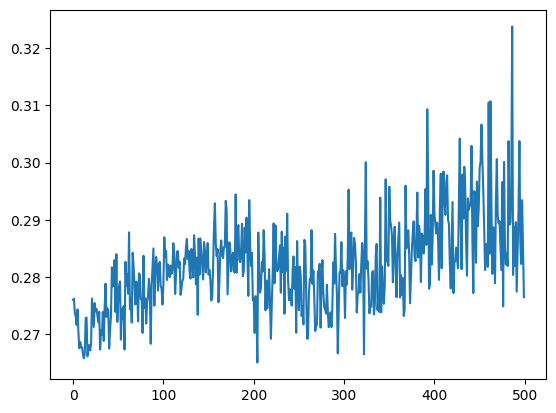

In [52]:
plt.plot(histroy.history['loss'])

# Batch_Size GD

In [53]:
model.compile(loss='binary_crossentropy', metrics='accuracy')
start = time.time()
"""Here i am skiping Train_test_spiliting i will take X_scaled it's mean 400 rows and y"""
histroy = model.fit(X_scaled, y, epochs=500, batch_size=400, validation_split=0.2)
print(f'Run_Time: {time.time() - start}')

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.2966 - accuracy: 0.9094 - val_loss: 0.2184 - val_accuracy: 0.9375
Epoch 2/500
1/1 [==============================] - 0s 59ms/step - loss: 0.2822 - accuracy: 0.9062 - val_loss: 0.2225 - val_accuracy: 0.9375
Epoch 3/500
1/1 [==============================] - 0s 53ms/step - loss: 0.2727 - accuracy: 0.9062 - val_loss: 0.2256 - val_accuracy: 0.9375
Epoch 4/500
1/1 [==============================] - 0s 55ms/step - loss: 0.2657 - accuracy: 0.9094 - val_loss: 0.2297 - val_accuracy: 0.9375
Epoch 5/500
1/1 [==============================] - 0s 56ms/step - loss: 0.2608 - accuracy: 0.9125 - val_loss: 0.2314 - val_accuracy: 0.9250
Epoch 6/500
1/1 [==============================] - 0s 55ms/step - loss: 0.2570 - accuracy: 0.9125 - val_loss: 0.2352 - val_accuracy: 0.9250
Epoch 7/500
1/1 [==============================] - 0s 54ms/step - loss: 0.2538 - accuracy: 0.9125 - val_loss: 0.2374 - val_accuracy: 0.9250
Epoch 8/500
1/1 [=====

1/1 [==============================] - 0s 56ms/step - loss: 0.2228 - accuracy: 0.9125 - val_loss: 0.2659 - val_accuracy: 0.9125
Epoch 60/500
1/1 [==============================] - 0s 56ms/step - loss: 0.2226 - accuracy: 0.9125 - val_loss: 0.2673 - val_accuracy: 0.9125
Epoch 61/500
1/1 [==============================] - 0s 57ms/step - loss: 0.2223 - accuracy: 0.9156 - val_loss: 0.2641 - val_accuracy: 0.9375
Epoch 62/500
1/1 [==============================] - 0s 51ms/step - loss: 0.2221 - accuracy: 0.9125 - val_loss: 0.2676 - val_accuracy: 0.9125
Epoch 63/500
1/1 [==============================] - 0s 60ms/step - loss: 0.2216 - accuracy: 0.9156 - val_loss: 0.2648 - val_accuracy: 0.9250
Epoch 64/500
1/1 [==============================] - 0s 50ms/step - loss: 0.2213 - accuracy: 0.9187 - val_loss: 0.2655 - val_accuracy: 0.9250
Epoch 65/500
1/1 [==============================] - 0s 51ms/step - loss: 0.2210 - accuracy: 0.9187 - val_loss: 0.2652 - val_accuracy: 0.9375
Epoch 66/500
1/1 [========

1/1 [==============================] - 0s 50ms/step - loss: 0.2119 - accuracy: 0.9156 - val_loss: 0.2560 - val_accuracy: 0.9500
Epoch 118/500
1/1 [==============================] - 0s 49ms/step - loss: 0.2117 - accuracy: 0.9187 - val_loss: 0.2506 - val_accuracy: 0.9500
Epoch 119/500
1/1 [==============================] - 0s 53ms/step - loss: 0.2117 - accuracy: 0.9156 - val_loss: 0.2554 - val_accuracy: 0.9500
Epoch 120/500
1/1 [==============================] - 0s 49ms/step - loss: 0.2115 - accuracy: 0.9156 - val_loss: 0.2515 - val_accuracy: 0.9500
Epoch 121/500
1/1 [==============================] - 0s 49ms/step - loss: 0.2114 - accuracy: 0.9156 - val_loss: 0.2549 - val_accuracy: 0.9500
Epoch 122/500
1/1 [==============================] - 0s 48ms/step - loss: 0.2113 - accuracy: 0.9187 - val_loss: 0.2502 - val_accuracy: 0.9500
Epoch 123/500
1/1 [==============================] - 0s 48ms/step - loss: 0.2112 - accuracy: 0.9156 - val_loss: 0.2544 - val_accuracy: 0.9500
Epoch 124/500
1/1 [=

Epoch 175/500
1/1 [==============================] - 0s 58ms/step - loss: 0.2069 - accuracy: 0.9187 - val_loss: 0.2526 - val_accuracy: 0.9500
Epoch 176/500
1/1 [==============================] - 0s 49ms/step - loss: 0.2069 - accuracy: 0.9187 - val_loss: 0.2466 - val_accuracy: 0.9500
Epoch 177/500
1/1 [==============================] - 0s 54ms/step - loss: 0.2071 - accuracy: 0.9187 - val_loss: 0.2562 - val_accuracy: 0.9375
Epoch 178/500
1/1 [==============================] - 0s 53ms/step - loss: 0.2068 - accuracy: 0.9187 - val_loss: 0.2460 - val_accuracy: 0.9500
Epoch 179/500
1/1 [==============================] - 0s 59ms/step - loss: 0.2068 - accuracy: 0.9187 - val_loss: 0.2540 - val_accuracy: 0.9500
Epoch 180/500
1/1 [==============================] - 0s 50ms/step - loss: 0.2067 - accuracy: 0.9187 - val_loss: 0.2476 - val_accuracy: 0.9500
Epoch 181/500
1/1 [==============================] - 0s 52ms/step - loss: 0.2066 - accuracy: 0.9187 - val_loss: 0.2522 - val_accuracy: 0.9500
Epoch 

Epoch 233/500
1/1 [==============================] - 0s 76ms/step - loss: 0.2047 - accuracy: 0.9187 - val_loss: 0.2477 - val_accuracy: 0.9500
Epoch 234/500
1/1 [==============================] - 0s 50ms/step - loss: 0.2048 - accuracy: 0.9187 - val_loss: 0.2449 - val_accuracy: 0.9500
Epoch 235/500
1/1 [==============================] - 0s 52ms/step - loss: 0.2045 - accuracy: 0.9187 - val_loss: 0.2461 - val_accuracy: 0.9500
Epoch 236/500
1/1 [==============================] - 0s 49ms/step - loss: 0.2045 - accuracy: 0.9187 - val_loss: 0.2452 - val_accuracy: 0.9500
Epoch 237/500
1/1 [==============================] - 0s 50ms/step - loss: 0.2044 - accuracy: 0.9187 - val_loss: 0.2469 - val_accuracy: 0.9375
Epoch 238/500
1/1 [==============================] - 0s 53ms/step - loss: 0.2045 - accuracy: 0.9187 - val_loss: 0.2463 - val_accuracy: 0.9375
Epoch 239/500
1/1 [==============================] - 0s 51ms/step - loss: 0.2044 - accuracy: 0.9187 - val_loss: 0.2438 - val_accuracy: 0.9500
Epoch 

Epoch 291/500
1/1 [==============================] - 0s 52ms/step - loss: 0.2025 - accuracy: 0.9187 - val_loss: 0.2477 - val_accuracy: 0.9375
Epoch 292/500
1/1 [==============================] - 0s 53ms/step - loss: 0.2024 - accuracy: 0.9219 - val_loss: 0.2409 - val_accuracy: 0.9375
Epoch 293/500
1/1 [==============================] - 0s 51ms/step - loss: 0.2023 - accuracy: 0.9187 - val_loss: 0.2468 - val_accuracy: 0.9375
Epoch 294/500
1/1 [==============================] - 0s 51ms/step - loss: 0.2023 - accuracy: 0.9219 - val_loss: 0.2409 - val_accuracy: 0.9375
Epoch 295/500
1/1 [==============================] - 0s 51ms/step - loss: 0.2023 - accuracy: 0.9187 - val_loss: 0.2466 - val_accuracy: 0.9375
Epoch 296/500
1/1 [==============================] - 0s 50ms/step - loss: 0.2022 - accuracy: 0.9219 - val_loss: 0.2420 - val_accuracy: 0.9375
Epoch 297/500
1/1 [==============================] - 0s 50ms/step - loss: 0.2022 - accuracy: 0.9187 - val_loss: 0.2470 - val_accuracy: 0.9375
Epoch 

Epoch 349/500
1/1 [==============================] - 0s 57ms/step - loss: 0.2012 - accuracy: 0.9219 - val_loss: 0.2451 - val_accuracy: 0.9250
Epoch 350/500
1/1 [==============================] - 0s 53ms/step - loss: 0.2011 - accuracy: 0.9219 - val_loss: 0.2387 - val_accuracy: 0.9375
Epoch 351/500
1/1 [==============================] - 0s 54ms/step - loss: 0.2012 - accuracy: 0.9219 - val_loss: 0.2452 - val_accuracy: 0.9250
Epoch 352/500
1/1 [==============================] - 0s 50ms/step - loss: 0.2011 - accuracy: 0.9219 - val_loss: 0.2394 - val_accuracy: 0.9375
Epoch 353/500
1/1 [==============================] - 0s 50ms/step - loss: 0.2011 - accuracy: 0.9219 - val_loss: 0.2456 - val_accuracy: 0.9250
Epoch 354/500
1/1 [==============================] - 0s 51ms/step - loss: 0.2011 - accuracy: 0.9219 - val_loss: 0.2386 - val_accuracy: 0.9375
Epoch 355/500
1/1 [==============================] - 0s 52ms/step - loss: 0.2011 - accuracy: 0.9219 - val_loss: 0.2446 - val_accuracy: 0.9250
Epoch 

Epoch 407/500
1/1 [==============================] - 0s 53ms/step - loss: 0.2004 - accuracy: 0.9219 - val_loss: 0.2359 - val_accuracy: 0.9250
Epoch 408/500
1/1 [==============================] - 0s 47ms/step - loss: 0.2001 - accuracy: 0.9219 - val_loss: 0.2433 - val_accuracy: 0.9250
Epoch 409/500
1/1 [==============================] - 0s 47ms/step - loss: 0.2001 - accuracy: 0.9219 - val_loss: 0.2375 - val_accuracy: 0.9250
Epoch 410/500
1/1 [==============================] - 0s 50ms/step - loss: 0.2001 - accuracy: 0.9219 - val_loss: 0.2434 - val_accuracy: 0.9250
Epoch 411/500
1/1 [==============================] - 0s 51ms/step - loss: 0.2000 - accuracy: 0.9219 - val_loss: 0.2379 - val_accuracy: 0.9250
Epoch 412/500
1/1 [==============================] - 0s 57ms/step - loss: 0.2000 - accuracy: 0.9219 - val_loss: 0.2431 - val_accuracy: 0.9250
Epoch 413/500
1/1 [==============================] - 0s 56ms/step - loss: 0.1999 - accuracy: 0.9219 - val_loss: 0.2383 - val_accuracy: 0.9250
Epoch 

Epoch 465/500
1/1 [==============================] - 0s 46ms/step - loss: 0.1991 - accuracy: 0.9187 - val_loss: 0.2359 - val_accuracy: 0.9250
Epoch 466/500
1/1 [==============================] - 0s 44ms/step - loss: 0.1989 - accuracy: 0.9219 - val_loss: 0.2414 - val_accuracy: 0.9125
Epoch 467/500
1/1 [==============================] - 0s 45ms/step - loss: 0.1990 - accuracy: 0.9187 - val_loss: 0.2375 - val_accuracy: 0.9250
Epoch 468/500
1/1 [==============================] - 0s 46ms/step - loss: 0.1990 - accuracy: 0.9219 - val_loss: 0.2401 - val_accuracy: 0.9125
Epoch 469/500
1/1 [==============================] - 0s 47ms/step - loss: 0.1991 - accuracy: 0.9187 - val_loss: 0.2362 - val_accuracy: 0.9250
Epoch 470/500
1/1 [==============================] - 0s 47ms/step - loss: 0.1989 - accuracy: 0.9219 - val_loss: 0.2415 - val_accuracy: 0.9125
Epoch 471/500
1/1 [==============================] - 0s 47ms/step - loss: 0.1990 - accuracy: 0.9187 - val_loss: 0.2359 - val_accuracy: 0.9250
Epoch 

In [54]:
# val_accuracy: 0.9125
# Run_Time: 29.62485408782959

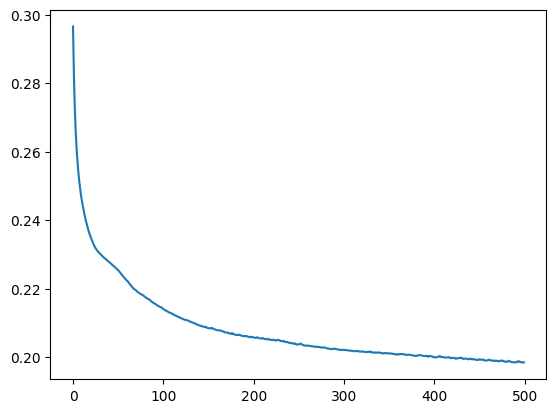

In [55]:
plt.plot(histroy.history['loss'])

In [56]:
# now see Stochastic is unstable where batch_size algorithms are stable and smooth

<p>Vectorization is a process that converts an algorithm from operating on a single value at a time to operating on a set of values (vector) at one time.</p>

In [57]:
# it's better then loop but it's not work with big data

In [ ]:
# mini_batch = 32 it's best 